#  Gathering Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read csv file and convert into dataframe
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
#Null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# no null values find in dataset

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
#Describe dataset.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#value count in target column
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
# Visual insights

<AxesSubplot:xlabel='quality', ylabel='count'>

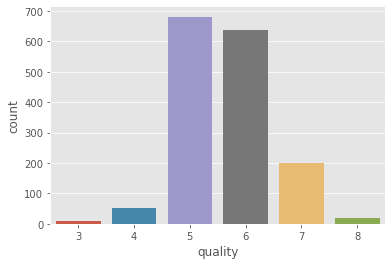

In [11]:
from matplotlib import style
style.use('ggplot')
sns.countplot(df['quality'])

<function matplotlib.pyplot.show(close=None, block=None)>

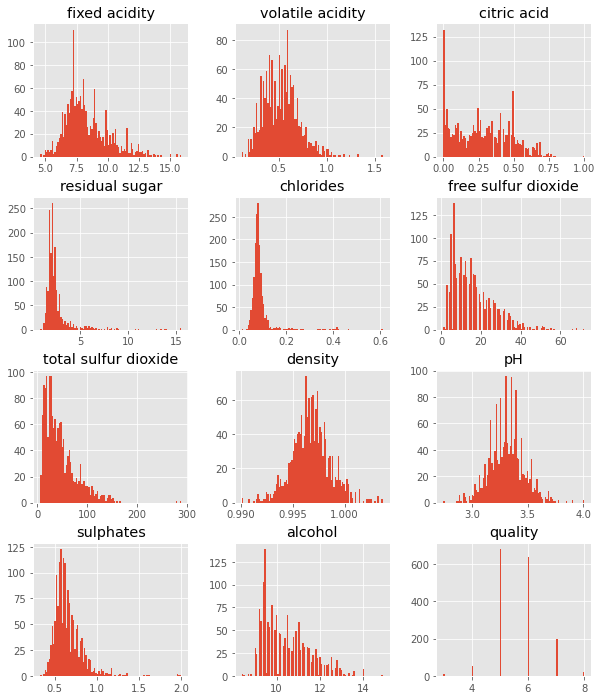

In [12]:
df.hist(bins=100,figsize=(10,12))
plt.show

In [39]:
# constructing a heatmap to understand the Correlation between the columns

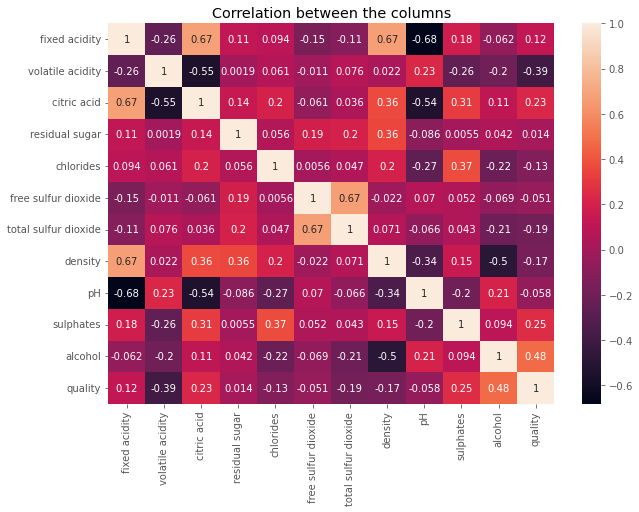

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

In [14]:
# we can understand that column alcohol as highest correlation with the target column and volatile acidity as least correlation with the target column 'quality'

In [15]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

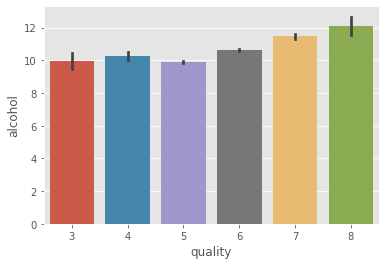

In [16]:
sns.barplot(df['quality'],df['alcohol'])

In [17]:
#data processing

In [18]:
#Label Binarization

df['quality']=df.quality.apply(lambda x:1 if x>=7 else 0)

In [19]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [20]:
#separate the data ana label
X = df.drop('quality', axis=1)
y = df['quality']

In [40]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [21]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [23]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("X_test",X_test.shape)

X_train (1119, 11)
y_train (1119,)
X_test (480, 11)
X_test (480, 11)


In [24]:
# Model Training

In [25]:
#Logistic Regression model

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(lr_pred, y_test)
print("test accuracy is : {:2f}%".format(lr_acc*100))

test accuracy is : 86.666667%


In [27]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       413
           1       0.56      0.22      0.32        67

    accuracy                           0.87       480
   macro avg       0.72      0.60      0.62       480
weighted avg       0.84      0.87      0.84       480



TN:  401
FN:  52
TP:  15
FP:  12


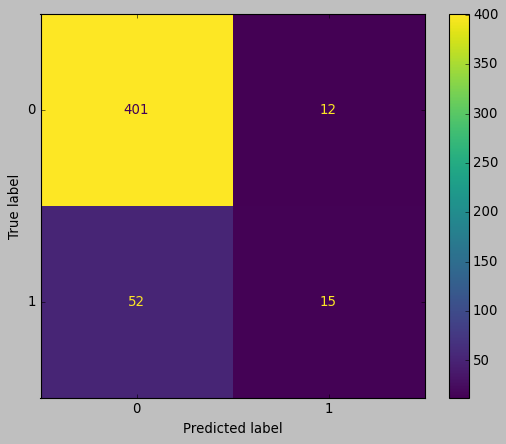

In [28]:
style.use('classic')
cm = confusion_matrix(y_test, lr_pred, labels = lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [30]:
#Decision Tree

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {: .2f}%".format(dtree_acc*100))

Test accuracy:  86.04%


In [33]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.50      0.64      0.56        67

    accuracy                           0.86       480
   macro avg       0.72      0.77      0.74       480
weighted avg       0.88      0.86      0.87       480



TN:  370
FN:  24
TP:  43
FP:  43


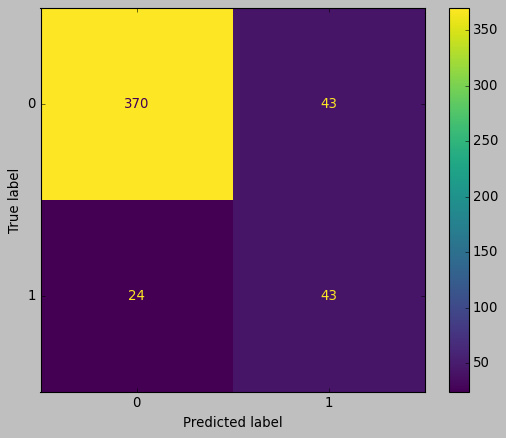

In [34]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels = dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [35]:
# Random Forest

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(rf_pred, y_test)
print("Test accuracy: {: .2f}%".format(rf_acc*100))

Test accuracy:  89.79%


In [37]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       413
           1       0.67      0.52      0.59        67

    accuracy                           0.90       480
   macro avg       0.80      0.74      0.76       480
weighted avg       0.89      0.90      0.89       480



TN:  396
FN:  32
TP:  35
FP:  17


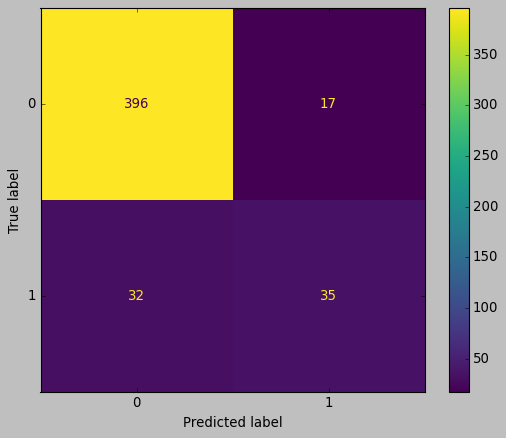

In [38]:
style.use('classic')
cm = confusion_matrix(y_test, rf_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [59]:
RandomForestClassifier() 

RandomForestClassifier()

In [60]:
from sklearn.model_selection import GridSearchCV
#creatig parameter list to pass in GridSearchCV
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth': [4,5,6,7,8],
             'criterion':['gini','entropy']}


In [61]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,y_train)#fitting the data i model
GCV.best_params_ #printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [62]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [63]:
RandomForestClassifier()

RandomForestClassifier()

In [64]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

In [66]:
GCV_pred=GCV.best_estimator_.predict(X_test)#predicting with best parameters
accuracy_score(y_test,GCV_pred)#checking final accuracy

0.8729166666666667

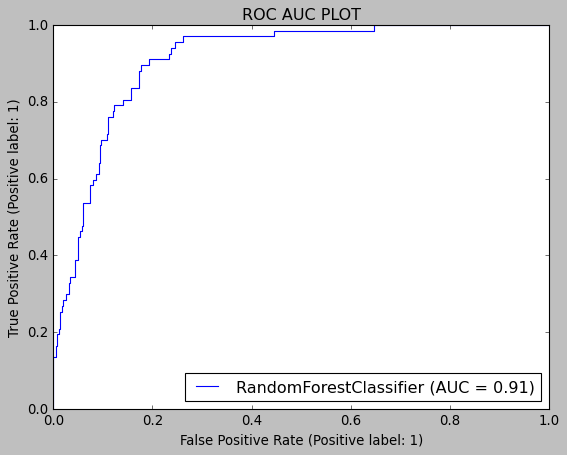

In [67]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,y_test)
plt.title("ROC AUC PLOT")
plt.show()

In [ ]:
Final accuracy is 87% and AUC score is 91% which is good

In [69]:
#saving the model in pickle format

In [70]:
import joblib
joblib.dump(GCV.best_estimator_,"RedWineQuality.pkl")

['RedWineQuality.pkl']

In [71]:
#Building a predictive system

input_data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)
 #changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good Qualit Wine')
else:
    print('Bad Quality Wine')

[1]
Good Qualit Wine
